In [4]:
import numpy as np
import random
import matplotlib.pyplot as plt
from matplotlib.patches import Circle

random.seed(10)

class Point: 
    def __init__(self, type):
        self.type = type
        self.coordinates = np.array([0, 0])
        self.radius = 0.2

    def create_target(self):
        x = random.uniform(-3.0, 3.0)
        y = random.uniform(-2.0, 2.0)
        self.coordinates = np.array([x, y])
        return self.coordinates
    
    def create_defense(self, target):
        x = random.uniform((target.coordinates[0] - self.radius) - 1.5, (target.coordinates[0] + self.radius) + 1.5)
        y = random.uniform((target.coordinates[1] - self.radius) - 1.5, (target.coordinates[1] + self.radius) + 1.5)
        self.coordinates = np.array([x, y])
        return self.coordinates
    
    def create_attack(self, target, defense):
        x_side_left = random.uniform(-9.5, (target.coordinates[0] - self.radius) - 2)
        x_side_right = random.uniform((target.coordinates[0] + self.radius) + 2, 9.5)
        y_below = random.uniform((target.coordinates[1] - self.radius) - 2, -9.5)
        y_above = random.uniform((target.coordinates[1] + self.radius) + 2, 9.5)
        x_inclusive = random.uniform(-9.5, 9.5)
        y_inclusive = random.uniform(-9.5, 9.5)
        y_below_x_inclusive = np.array([x_inclusive, y_below])
        y_above_x_inclusive = np.array([x_inclusive, y_above])
        x_left_y_inclusive = np.array([x_side_left, y_inclusive])
        x_right_y_inclusive = np.array([x_side_right, y_inclusive])

        self.coordinates = random.choice([y_below_x_inclusive, y_above_x_inclusive, x_left_y_inclusive, x_right_y_inclusive])
        return self.coordinates
    
target = Point("target")
target.create_target()
print("Target Coordinates:", target.coordinates)

defense = Point("defense")
defense.create_defense(target)
print("Defense Coordinates:", defense.coordinates)

attack = Point("attack")
attack.create_attack(target, defense)
print("Attack Coordinates:", attack.coordinates)

Target Coordinates: [ 0.42841557 -0.28444378]
Defense Coordinates: [ 0.69392599 -1.28370979]
Attack Coordinates: [0.39271783 3.13080828]


0.428415568139481 -0.2844437812995415
0.2
0.69392599199668 -1.2837097920252356
0.2
0.39271783315856723 3.130808282220004
0.2


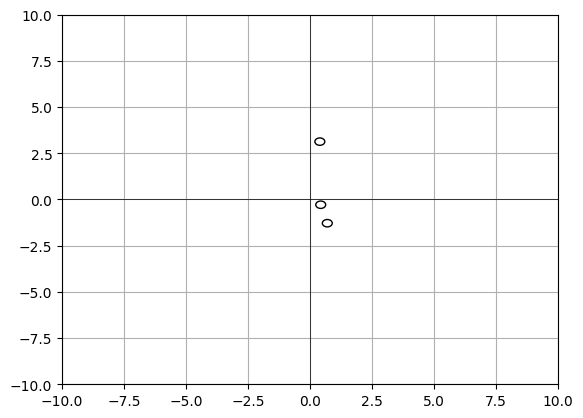

In [11]:
coords = [target.coordinates, defense.coordinates, attack.coordinates]
radii = [target.radius, defense.radius, attack.radius]

for i in range(len(coords)):
    print(coords[i][0], coords[i][1])
    print(radii[i])

fig, ax = plt.subplots()
plt.xlim(-10, 10)
plt.ylim(-10, 10)

plt.axhline(0, color='black',linewidth=0.5)
plt.axvline(0, color='black',linewidth=0.5)
plt.grid(True)

for i in range(len(coords)):
    circle = Circle((coords[i][0], coords[i][1]), radii[i], edgecolor='black', facecolor='None')
    ax.add_patch(circle)

